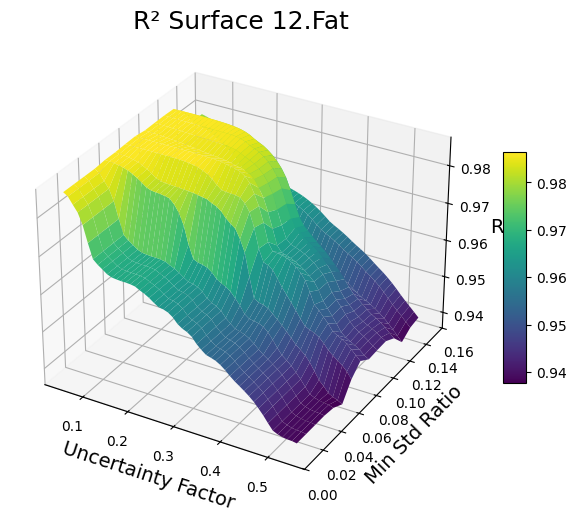

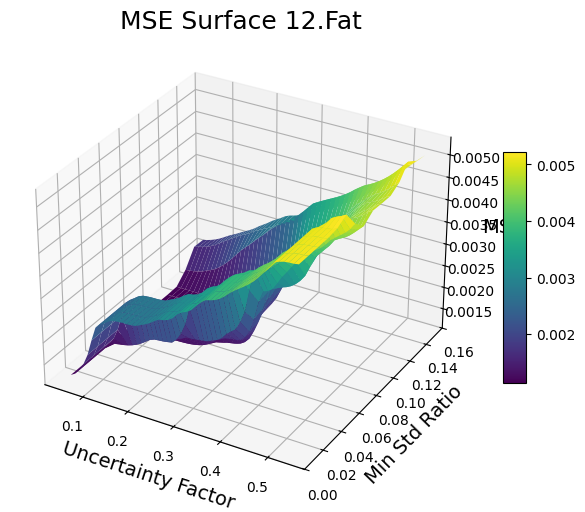

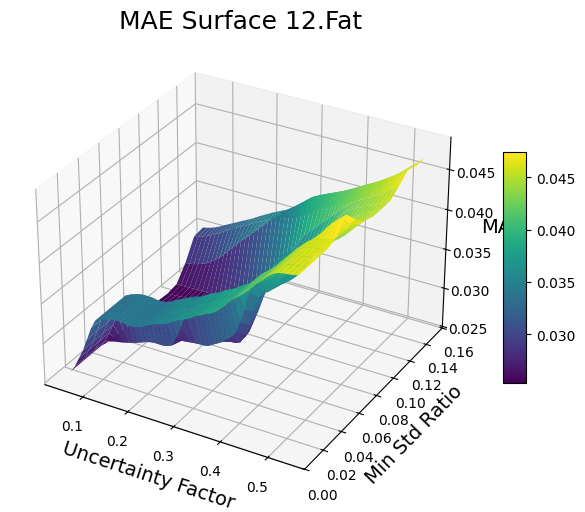

In [1]:
from notebook_resolver import *
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from src.dataset import WorkSheet

# Load dataset
df_raw = pd.read_excel("results/it2tsk_gaussian_exploration.xlsx")
worksheet_names = WorkSheet.DS12.value
df_filtered = df_raw[df_raw["Sheet Name"] == worksheet_names]
# Keeping only relevant columns
df_ = df_filtered[["Uncertainty Factor", "Min Std Ratio", "R2", "MSE", "MAE"]]

# Create grid for surface plots
def create_surface(df, x_col, y_col, z_col, title, cmap="viridis"):
    # Pivot table for meshgrid
    pivot = df.pivot_table(values=z_col, 
                           index=y_col, 
                           columns=x_col, 
                           aggfunc="mean")
    
    X, Y = np.meshgrid(pivot.columns, pivot.index)
    Z = pivot.values
    
    # Plot surface
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111, projection="3d")
    surf = ax.plot_surface(X, Y, Z, cmap=cmap, edgecolor="none")
    
    ax.set_xlabel(x_col, fontsize=14)
    ax.set_ylabel(y_col, fontsize=14)
    ax.set_zlabel(z_col, fontsize=14)
    ax.set_title(title, fontsize=18)
    fig.colorbar(surf, shrink=0.5, aspect=10)
    plt.show()


# === Generate plots ===
create_surface(df_, "Uncertainty Factor", "Min Std Ratio", "R2", f"R² Surface {worksheet_names}")
create_surface(df_, "Uncertainty Factor", "Min Std Ratio", "MSE", f"MSE Surface {worksheet_names}")
create_surface(df_, "Uncertainty Factor", "Min Std Ratio", "MAE", f"MAE Surface {worksheet_names}")
